# behavior

In [1]:
%load_ext autoreload
%autoreload 2
import cascade as cas
import flow
import pool
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy import stats

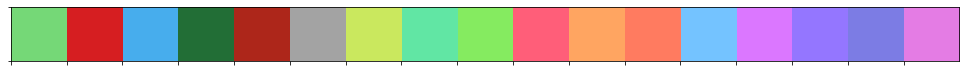

In [2]:
sns.palplot(cas.lookups.color_dict.values())

In [40]:
mice = cas.lookups.mice['all12']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
method='ncp_hals'
cs=''
warp=False
trace_type='zscore_day'
group_by='all3'
nan_thresh=0.95
score_threshold=0.8
staging='parsed_10stage'

# load your metadata
meta_list = []
for mouse, word in zip(mice, words):
    load_kwargs = {'mouse': mouse,
                   'method': method,
                   'cs': cs,
                   'warp': warp,
                   'word': word,
                   'trace_type': trace_type,
                   'group_by': group_by,
                   'nan_thresh': nan_thresh,
                   'score_threshold': score_threshold}
    meta = cas.load.groupday_tca_meta(**load_kwargs)

    # add your learning stage column if it doesn't exist
    if 'parsed_stage' not in meta.columns and 'parsed_stage' in staging:
        meta = cas.utils.add_5stages_to_meta(meta)
    elif 'parsed_10stage' not in meta.columns and 'parsed_10stage' in staging:
        meta = cas.utils.add_10stages_to_meta(meta)

    # add your dprime if it doesn't exist
    if 'dprime_run' not in meta.columns:
        meta = cas.utils.add_dprime_run_to_meta(meta);
    if 'dprime' not in meta.columns:
        meta = cas.utils.add_dprime_to_meta(meta);

    meta_list.append(meta)

meta_all = pd.concat(meta_list, axis=0)

Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match le

In [140]:
dprime_df = meta_all.groupby(['mouse', 'date', 'run']).min()
dprime_df.loc[dprime_df[staging].isin(['naive', 'early naive', 'late naive']), 'dprime_run'] = np.nan
dprime_df_day = meta_all.groupby(['mouse', 'date']).min()
dprime_df_day.loc[dprime_df_day[staging].isin(['naive', 'early naive', 'late naive']), 'dprime'] = np.nan

In [20]:
dprime_df[staging].unique()

array(['early high_dp learning', 'late high_dp learning',
       'late low_dp learning', 'early low_dp reversal1',
       'late low_dp reversal1', 'late high_dp reversal1',
       'early low_dp learning', 'early high_dp reversal1', 'early naive',
       'late naive'], dtype=object)

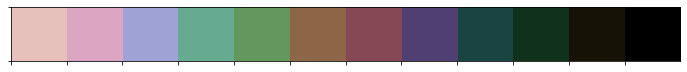

In [114]:
sns.palplot(sns.cubehelix_palette(12, start=1, rot=30, dark=0, light=.8, reverse=False))
# sns.cubehelix_palette(12, start=1, rot=5, dark=0, light=.8, reverse=True)

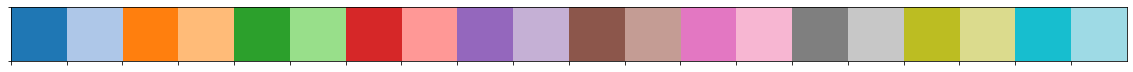

In [136]:
sns.palplot(sns.color_palette("tab20", 20,))

Text(0.5, 1.0, 'Orientation descrimination task performance\n')

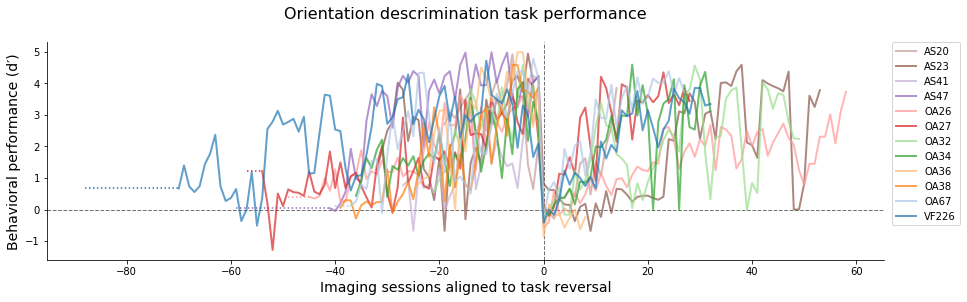

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
cmap = sns.color_palette('tab20', len(mice))[::-1]
# cmap = sns.cubehelix_palette(len(mice), start=1, rot=30, dark=0, light=.8, reverse=False)
ax.axhline(0, ls='--', color='#737373', linewidth=1)
ax.axvline(0, ls='--', color='#737373', linewidth=1)
for c, mouse in enumerate(mice):
    mboo = dprime_df.reset_index()['mouse'].isin([mouse]).values
    mouse_df = dprime_df.iloc[mboo, :]
    rev_ind = np.where(mouse_df[staging].isin(['early low_dp learning',
                                               'late low_dp learning',
                                               'early high_dp learning',
                                               'late high_dp learning',
                                               'low_dp learning',
                                               'high_dp learning']))[0][-1]
    y = mouse_df['dprime_run'].values
    x = np.arange(len(y)) - rev_ind - 1 # last learning ind, 0 is your last day of learning
    g=sns.lineplot(x=x, y=y, label=mouse, color=cmap[c], alpha=0.7, linewidth=2, ax=ax)
    
    # add dashed line for naive
    if any(np.isnan(y)):
        first_train_ind = np.where(np.isnan(y))[0][-1] + 1
        x2 = x[:first_train_ind+1]
        scale_by=y[first_train_ind]
        if scale_by < 0.05 and scale_by > -0.05:
             scale_by += 0.02
        y2 = np.ones(len(x2))*scale_by
        plt.plot(x2, y2, linestyle=':', color=cmap[c])
sns.despine()
ax.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', borderaxespad=0)
ax.set_xlabel('Imaging sessions aligned to task reversal', size=14)
ax.set_ylabel("Behavioral performance (d\u2032)", size=14)
ax.set_title('Orientation descrimination task performance\n', size=16)

Text(0.5, 1.0, 'Orientation descrimination task performance\n')

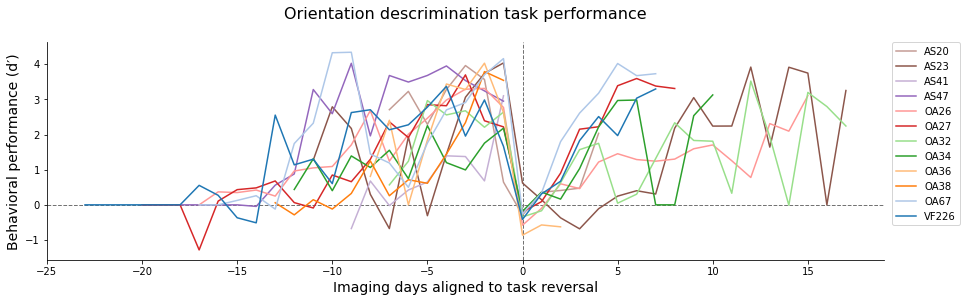

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
cmap = sns.color_palette('tab20', len(mice))[::-1]
ax.axhline(0, ls='--', color='#737373', linewidth=1)
ax.axvline(0, ls='--', color='#737373', linewidth=1)
for c, mouse in enumerate(mice):
    mboo = dprime_df_day.reset_index()['mouse'].isin([mouse]).values
    mouse_df = dprime_df_day.iloc[mboo, :]
    rev_ind = np.where(mouse_df[staging].isin(['early low_dp learning',
                                               'late low_dp learning',
                                               'early high_dp learning',
                                               'late high_dp learning',
                                               'low_dp learning',
                                               'high_dp learning']))[0][-1]
    y = mouse_df['dprime_run'].values
    x = np.arange(len(y)) - rev_ind - 1 # last learning ind, 0 is your last day of learning
    sns.lineplot(x=x, y=y, label=mouse, color=cmap[c], ax=ax)
    
    # add dashed line for naive
    if any(np.isnan(y)):
        first_train_ind = np.where(np.isnan(y))[0][-1] + 1
        x2 = x[:first_train_ind+1]
        scale_by=y[first_train_ind]
        if scale_by < 0.05 and scale_by > -0.05:
             scale_by -= 0.04
        y2 = np.ones(len(x2))*scale_by
        ax.plot(x2, y2, linestyle=':', color=cmap[c])
sns.despine()
ax.legend(bbox_to_anchor=(1.01, 1.0), loc='upper left', borderaxespad=0)
ax.set_xlabel('Imaging days aligned to task reversal', size=14)
ax.set_ylabel("Behavioral performance (d\u2032)", size=14)
ax.set_title('Orientation descrimination task performance\n', size=16)

Mice hashed: camp
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pa

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Mice hashed: camp
Mice hashed: camp
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updat

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Mice hashed: camp


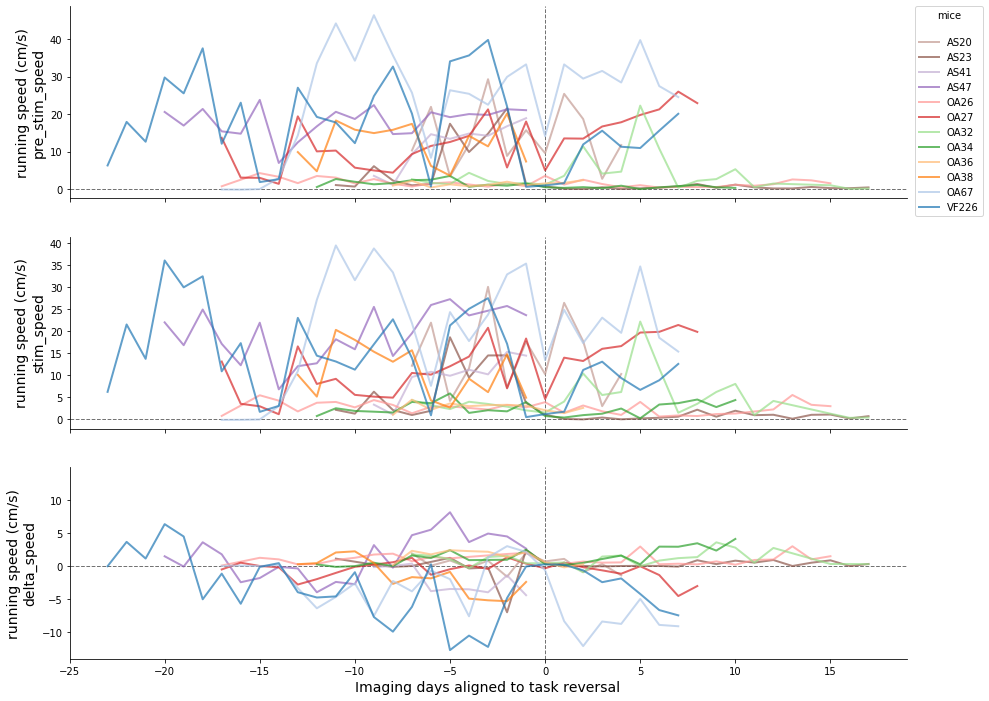

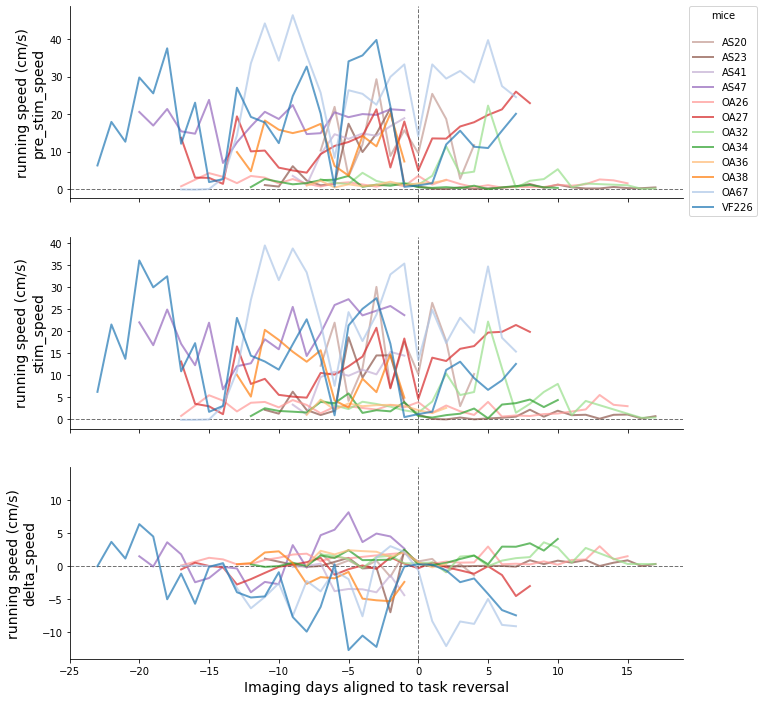

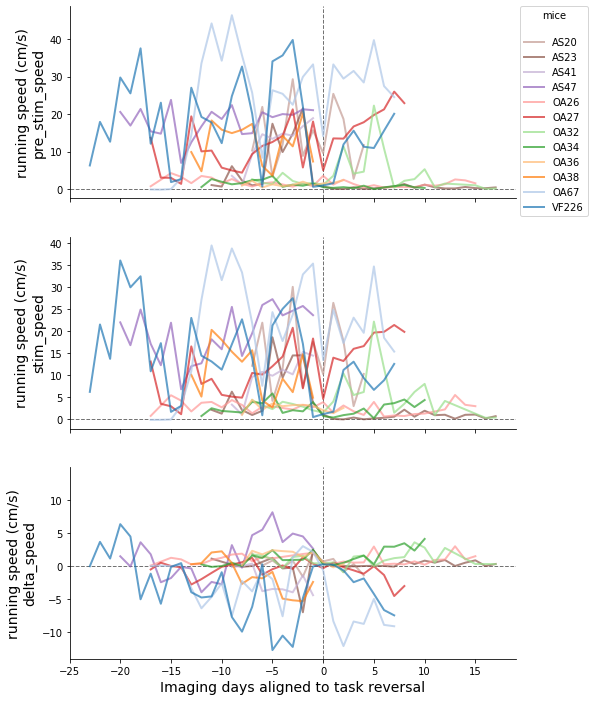

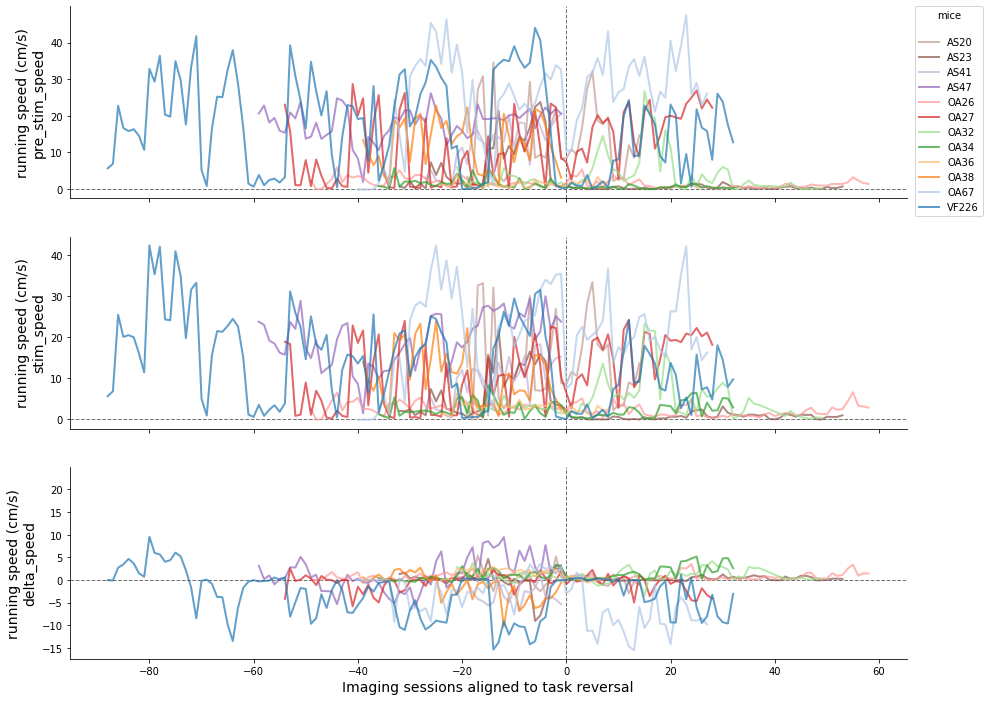

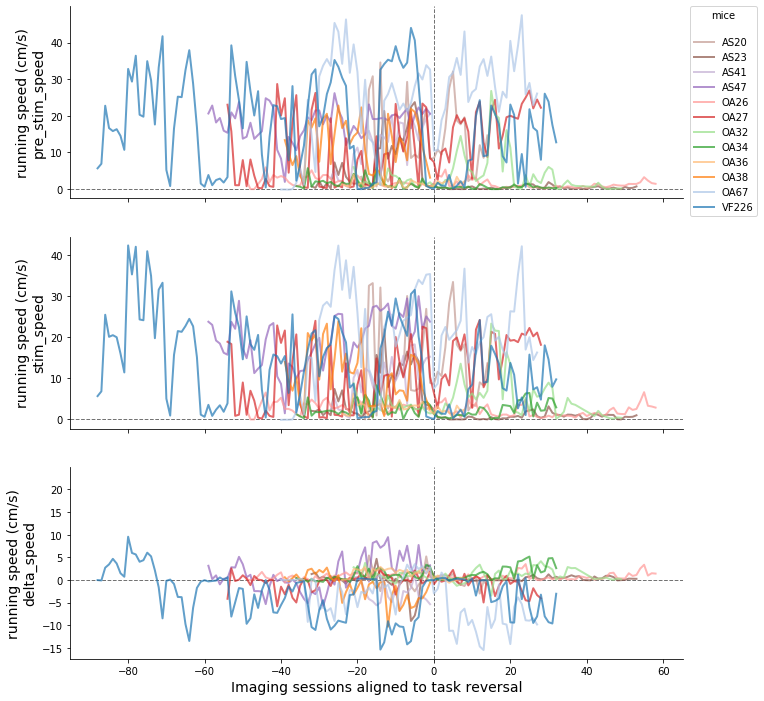

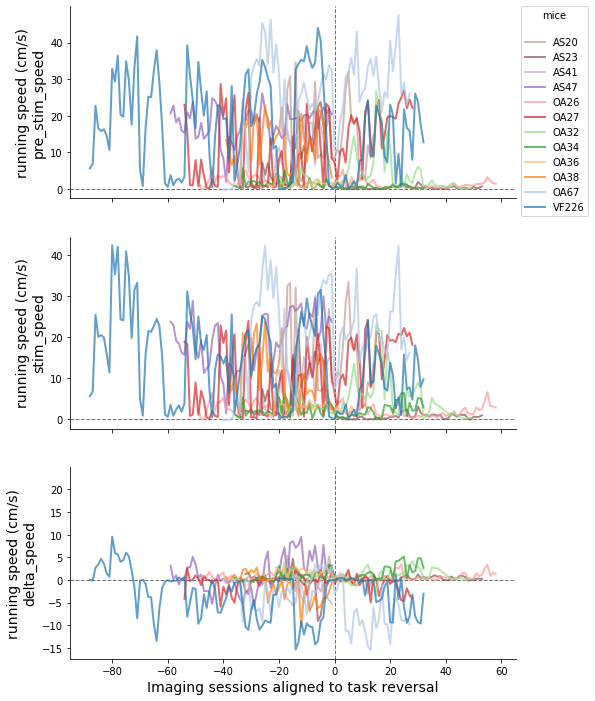

In [14]:
mice = cas.lookups.mice['all12']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
cas.plotting.behavior.plot_speed_across_mice(mice=mice, words=words, speed_by='day', scale_by=[1, .7, .5], ftype='png')
cas.plotting.behavior.plot_speed_across_mice(mice=mice, words=words, speed_by='run', scale_by=[1, .7, .5], ftype='png')

In [ ]:
mice = cas.lookups.mice['all12']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
cas.plotting.behavior.plot_licking_across_mice(mice=mice, words=words, lick_by='day', scale_by=[1, .7, .5], ftype='png')
cas.plotting.behavior.plot_licking_across_mice(mice=mice, words=words, lick_by='run', scale_by=[1, .7, .5], ftype='png')

Mice hashed: camp
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pa

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Mice hashed: camp
Mice hashed: camp
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updat

Mice hashed: camp
Updated naive cs-ori pairings to match learning.
     135 plus
     270 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     0 plus
     270 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     0 minus
     135 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     270 plus
     135 minus
     0 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pairings to match learning.
     135 plus
     0 minus
     270 neutral
Updated naive trialerror to match learning.
Updated naive cs-ori pa

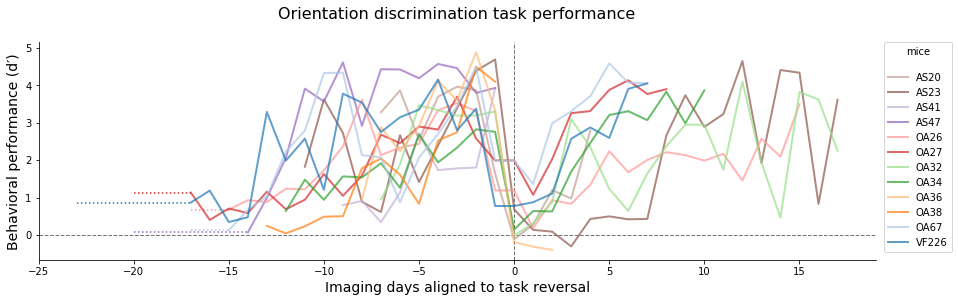

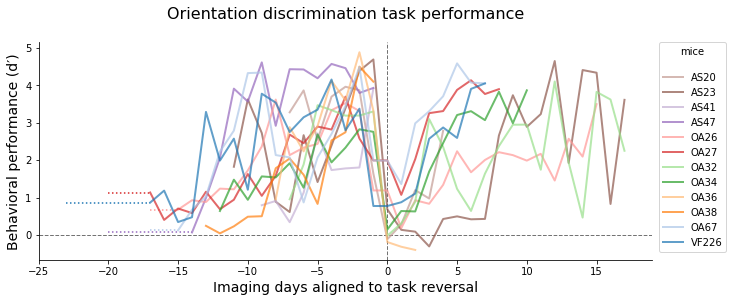

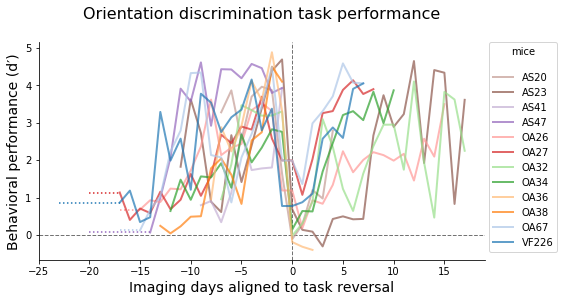

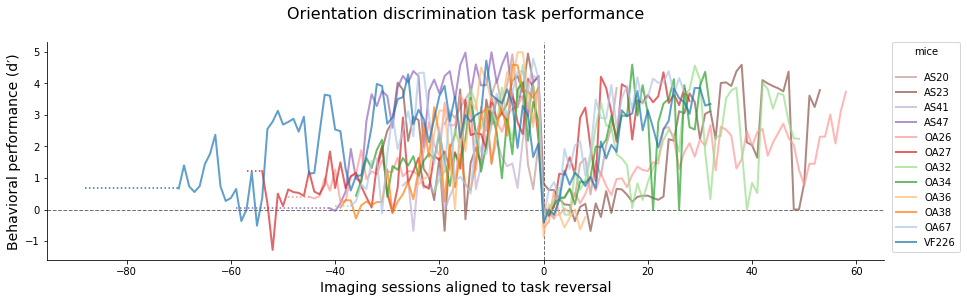

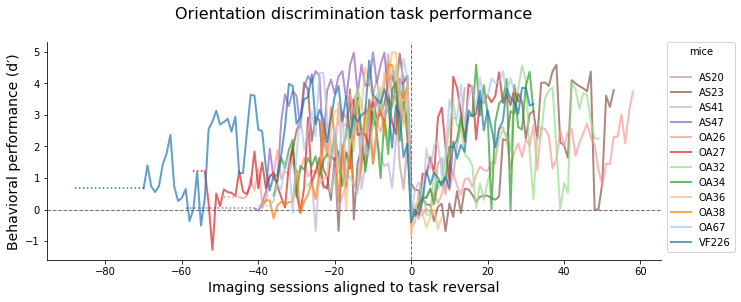

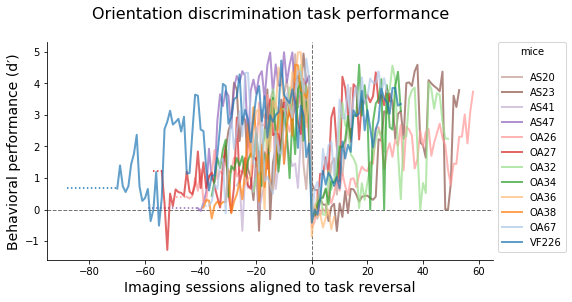

In [15]:
mice = cas.lookups.mice['all12']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
cas.plotting.behavior.plot_dprime_across_mice(mice=mice, words=words, dp_by='day', scale_by=[1, .7, .5], ftype='png')
cas.plotting.behavior.plot_dprime_across_mice(mice=mice, words=words, dp_by='run', scale_by=[1, .7, .5], ftype='png')

In [ ]:
mice = cas.lookups.mice['all12']
words = ['bookmarks' if m == 'OA27' else 'horrible' for m in mice]
# cas.plotting.behavior.summary_across_mice(mice, words, staging='parsed_10stage')
cas.plotting.behavior.barplots_summary_groupmouse(mice, words, staging='parsed_10stage', with_dp=True)
cas.plotting.behavior.barplots_summary_groupmouse(mice, words, staging='parsed_10stage')
cas.plotting.behavior.barplots_summary_groupmouse(mice, words, staging='parsed_stage', with_dp=True)
cas.plotting.behavior.barplots_summary_groupmouse(mice, words, staging='parsed_stage')